### Loading Libraries

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
data <- read.csv("heart.csv")
head(data)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [3]:
glimpse(data)

Observations: 303
Variables: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58...
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0...
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3...
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130...
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275...
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1...
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139...
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2...
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2...
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...
$ thal     <int> 1, 

In [4]:
ncol(data)

[1] 14

In [5]:
nrow(data)

[1] 303

In [6]:
colnames(data)

[1] "ï..age"   "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [8]:
data2 <- data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

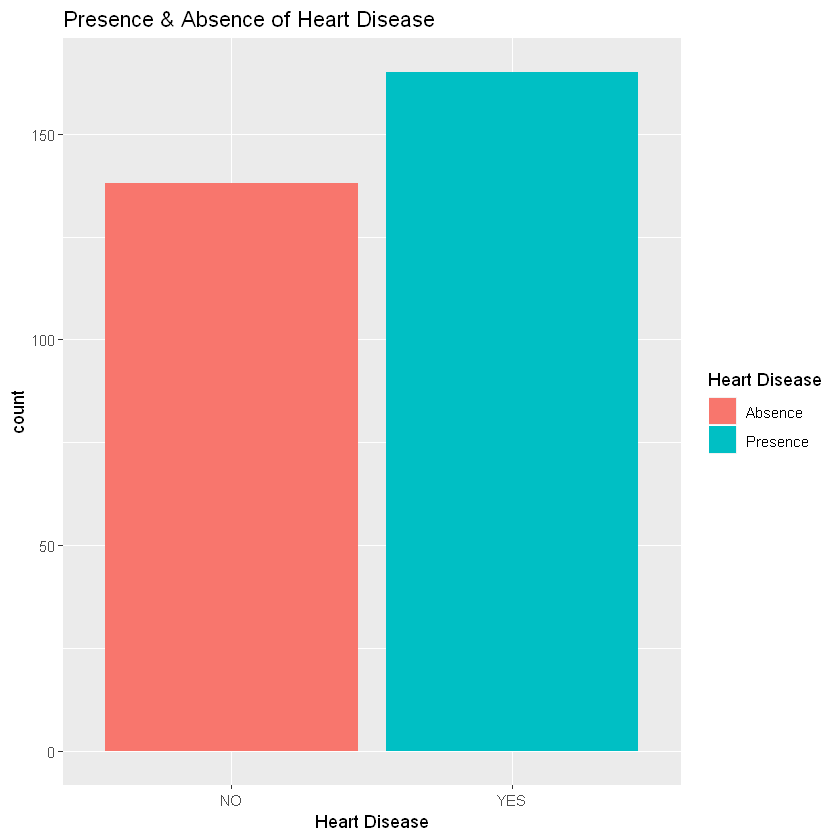

In [10]:
ggplot(data2, aes(x=data2$target, fill=data2$target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence","Presence"))

In [11]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

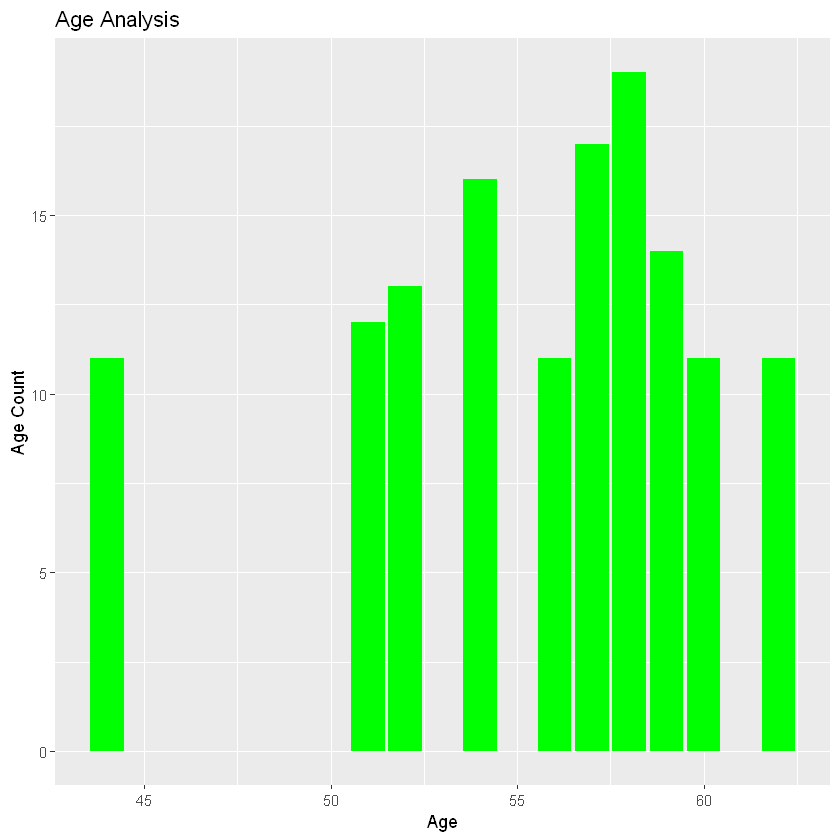

In [13]:
#counting the frequency of the values of age

data2 %>%
    group_by(ï..age) %>%
    count() %>%
    filter(n>10) %>%
    ggplot()+
    geom_col(aes(ï..age, n), fill = 'green')+
    ggtitle("Age Analysis")+
    xlab("Age")+
    ylab("Age Count")

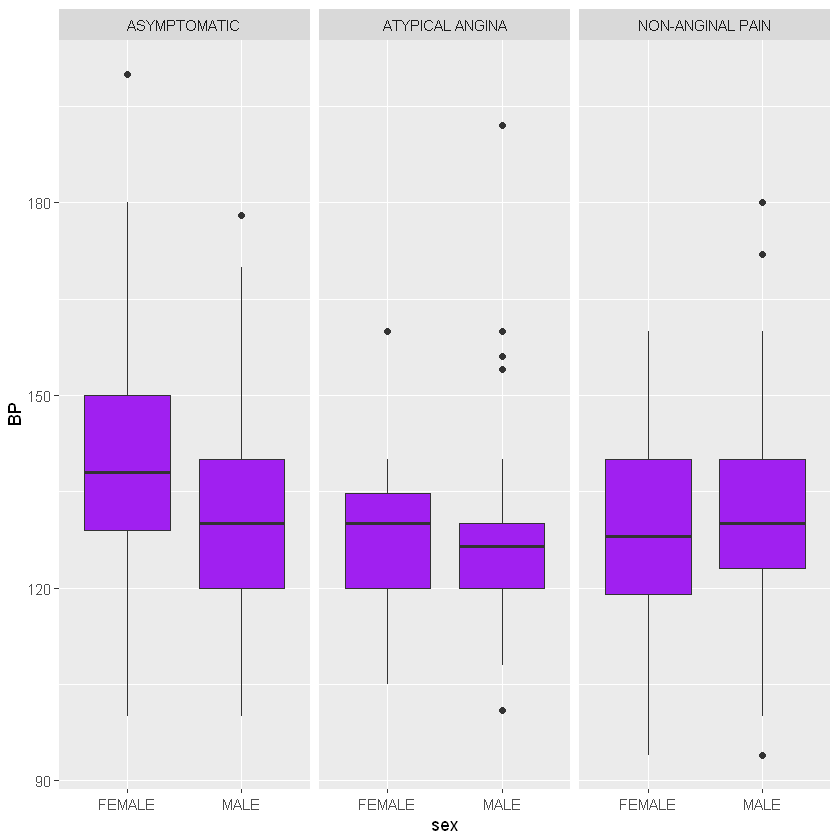

In [14]:
# compare blood pressure across the chest pain

data2 %>%
    ggplot(aes(x=sex, y=trestbps))+
    geom_boxplot(fill = 'purple')+
    xlab('sex')+
    ylab('BP')+
    facet_grid(~cp)

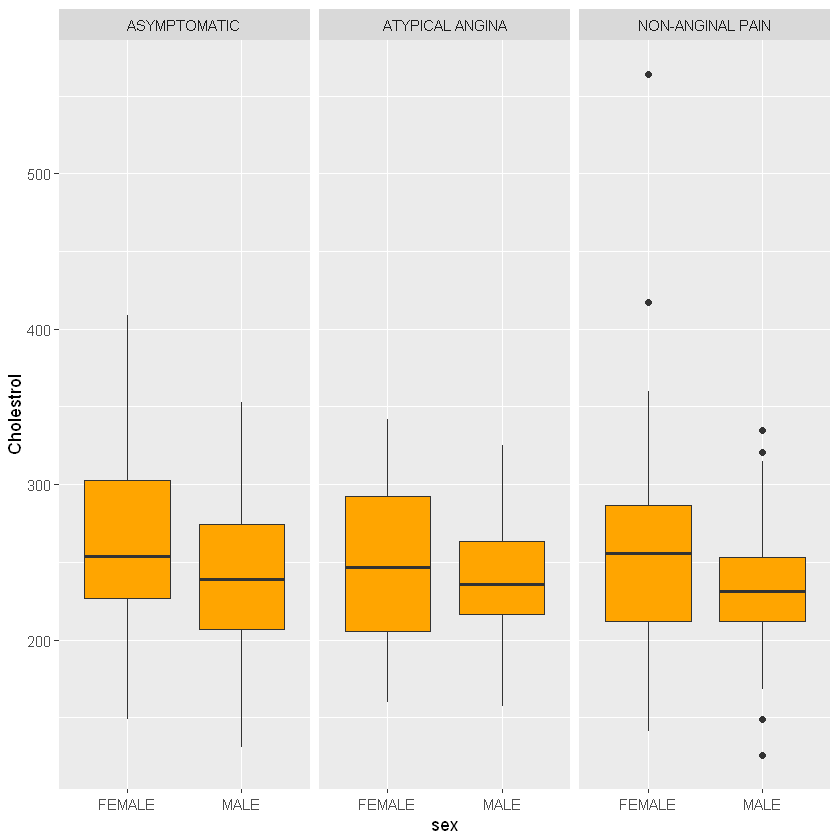

In [16]:
data2 %>%
    ggplot(aes(x=sex, y=chol))+
    geom_boxplot(fill = 'orange')+
    xlab('sex')+
    ylab('Cholestrol')+
    facet_grid(~cp)

In [17]:
# Correlation

install.packages("corrplot")
install.packages("ggplot2")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

also installing the dependencies 'isoband', 'rlang'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
rlang   0.4.11 0.4.12              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\Anaconda_Folder\envs\r\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to D:\Anaconda_Folder\envs\r\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\BAKASUR\AppData\Local\Temp\Rtmp0SunQ9\downloaded_packages


installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [18]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded


,ï..age,trestbps,chol,thalach,oldpeak
ï..age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


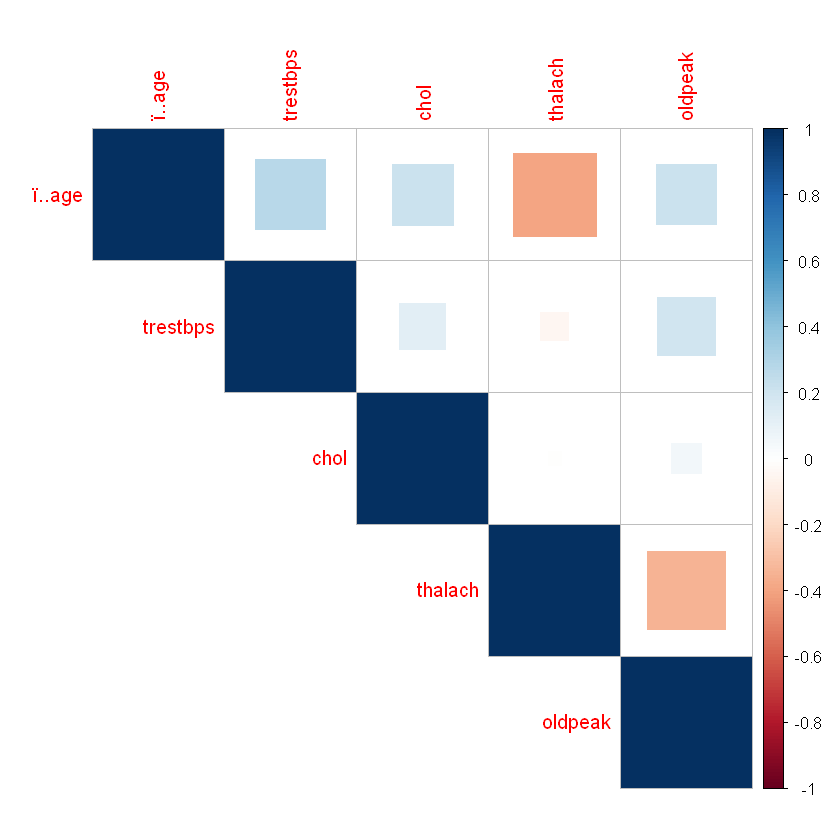

In [21]:
cor_heart <- cor(data2[, 10:14])
cor_heart

corrplot(cor_heart, method = 'square', type='upper')